# LSTM Concepts with Visualizations

The notebook introduces LSTMs, explaining its role in capturing long-term dependencies in sequential data, making them suitable for time-series prediction tasks.

**Model Building:**
The notebook contains multiple variations of LSTM models with different configurations, allowing for comparison between models with varying:
- Number of units (e.g., 10, 50).
- Number of layers (e.g., single LSTM layer vs. stacked LSTM layers).
- Different epochs for training (e.g., 100 vs. 300 epochs).

**Training the LSTM Models**:
- The notebook demonstrates how to train each of these LSTM models using a simple sequential input data and shows the fit function for model training.
- The notebook explores how tweaking model hyperparameters (e.g., the number of LSTM units, epochs, and layers) can affect the model's performance on sequential data. Understanding these parameters is crucial for improving model accuracy and generalization.

**Importance:**
- Understanding how LSTM models work and how to adjust their hyperparameters is crucial for tasks like time-series forecasting, natural language processing, or any sequential data tasks.
- The notebook helps users experiment with different LSTM setups, visualize their impact on training, and ultimately choose the best-performing model for their specific task.

In [4]:
#!pip install tensorflow
#!pip install pydot
#!pip install graphviz
#!pip install pydotplus
#!pip install pydot-ng

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model

Part 1: Understanding LSTM Basics


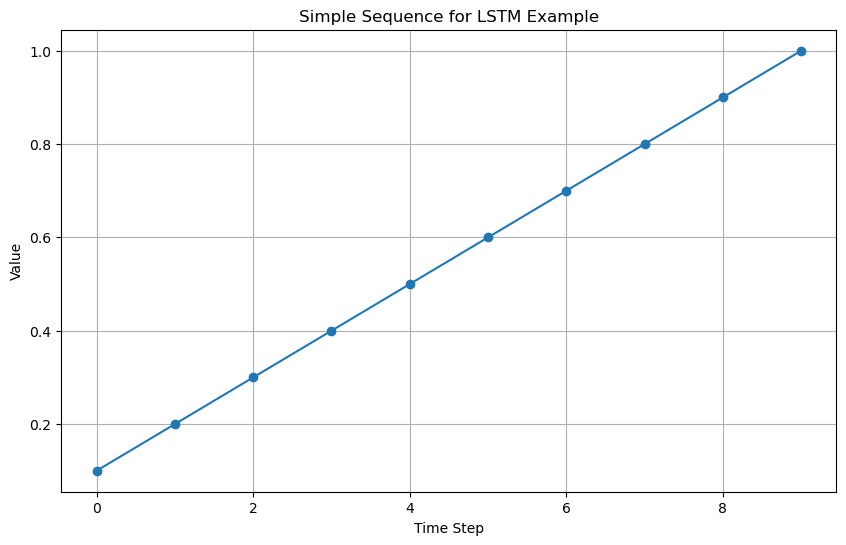

In [8]:
# Part 1: Understanding LSTM Basics
print("Part 1: Understanding LSTM Basics")

# Create a simple sequence
sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# ALTERNATIVES:
#sequence = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #Linear Sequence: just like the first one, but it has a different range and step size.
#sequence = np.array([0.5, 0.7, 0.9, 1.3, 1.8, 2.5, 3.5, 5.0, 7.0, 10.0]) #Exponential Sequence: grows exponentially; helps explore how the LSTM reacts to faster-growing sequences.
#sequence = np.sin(np.linspace(0, 2 * np.pi, 10))  #Oscillating Sequence: One cycle of a sine wave: introduces cyclical patterns and is useful for testing how well an LSTM can capture periodic dependencies.
#sequence = np.random.rand(10) #Random Sequence: can be used to test how the model performs when there is no obvious pattern in the data.
#sequence = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100]) # Quadratic Sequence: introducing a non-linear increasing pattern, which is good for testing the LSTM's ability to model non-linear relationships.
#sequence = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) # Decreasing Sequence: decreases linearly, offering a reverse pattern compared to an increasing sequence.
#sequence = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55]) #Fibonacci Sequence: The Fibonacci sequence grows at a slower rate initially but accelerates over time, giving the model a more complex pattern to learn.

# Visualize the sequence
plt.figure(figsize=(10, 6))
plt.plot(sequence, marker='o')
plt.title('Simple Sequence for LSTM Example')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [10]:
# Prepare data for LSTM (reshape to [samples, time steps, features])
X = sequence[:-1].reshape(1, 9, 1)
y = sequence[-1].reshape(1, 1)

In [12]:
# Pretty print X and y
print("X (Input Sequences):")
pprint(X)

print("\ny (Target):")
pprint(y)

X (Input Sequences):
array([[[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]]])

y (Target):
array([[1.]])


In [14]:
# Create a simple LSTM model
model = Sequential([
    LSTM(10, input_shape=(9, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)

C:\Users\Vitali\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### What is an epoch?

An epoch in the context of training an LSTM (or any neural network) refers to one complete pass of the training dataset through the model. In simpler terms, it means the model has seen and learned from every single data point in the training set once.

- Imagine you have a classroom of students learning a lesson. Each epoch is like giving the entire class one full lecture on the material.
- After one epoch, the model has learned something from all the data, but it might not have learned everything perfectly yet.
- So, you repeat the lesson (another epoch) to help the model get better at understanding the data.

**Multiple Epochs**: Just like students might need to hear the lesson several times to fully understand it, a model might need to see the entire dataset multiple times to learn patterns and make accurate predictions.

**Learning over time**: With each epoch, the model adjusts itself (updates its internal parameters) to try and make fewer mistakes when predicting the outcome. 
- The more epochs, the better the model gets—up to a point where it has learned the patterns well.
- But, the more epochs, the longer the model takes to fully train.

So, an epoch is simply one complete cycle of the model going through all the training data, adjusting itself, and preparing to do it again to improve.

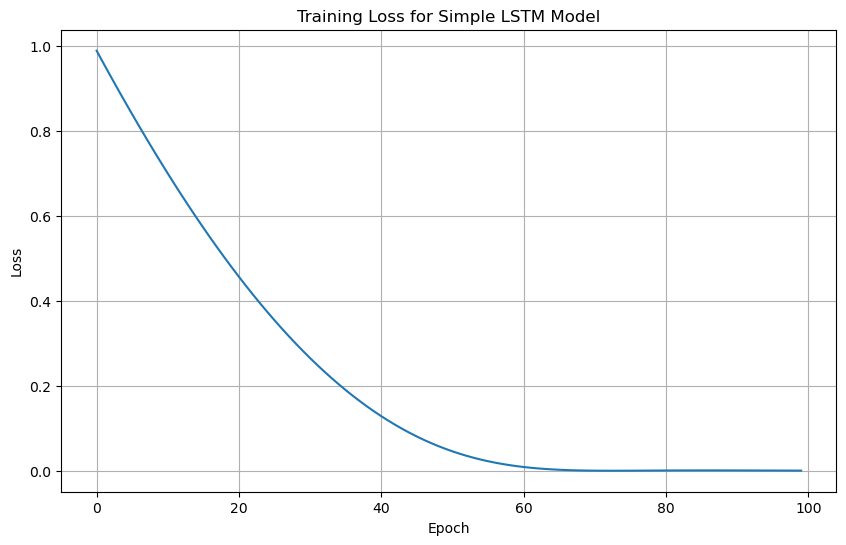

In [17]:
# Visualize the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Training Loss for Simple LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### Training Loss
When tweaking your LSTM model and observing the training loss function, here are some key aspects to watch for that indicate improvement:

#### 1. Smooth Decline in Loss
- **What to Watch**: The training loss should smoothly decline over the course of epochs.
- **Why**: A smooth and consistent decrease in loss indicates that the model is learning and improving its predictions. If the loss is erratic (jumps up and down), it could indicate learning instability, possibly due to a too-high learning rate, insufficient model complexity, or an inadequate architecture.

#### 2. Convergence of Loss
- **What to Watch**: The loss should eventually flatten out and converge to a small, steady value.
- **Why**: Once the loss converges, it means that the model is reaching an optimal solution or close to it. If the loss is decreasing too slowly, you may need to adjust the optimizer or increase the number of epochs.

#### 3. Training Loss Plateauing at High Value
- **What to Watch**: If the loss plateaus early at a high value and doesn’t decrease further, it could indicate an issue with model capacity, optimizer settings, or learning rate.
- **Why**: This could mean that the model isn't complex enough to capture the data patterns, or that the learning rate is too small/large, leading to slow or unstable learning.

  **Solution**: Try increasing the model complexity (e.g., more LSTM units, additional layers), or adjust the learning rate.

#### 4. Sudden Spikes in Loss
- **What to Watch**: Look out for sudden spikes in the loss during training.
- **Why**: This could indicate instability in the learning process, often caused by a learning rate that is too high or inappropriate weight initialization. Reducing the learning rate or using a different optimizer might help.

#### 5. Very Slow Loss Reduction
- **What to Watch**: If the loss is decreasing too slowly, especially over many epochs, it could be a sign that the learning rate is too small or that the model architecture is not capturing the complexity of the data.
- **Why**: The model may not be learning fast enough to make significant progress in training.
  
  **Solution**: Increase the learning rate slightly, or try a different optimizer like `RMSprop` or `Adam` with different parameters.

#### 6. Sudden Drop in Loss (Over a Few Epochs)
- **What to Watch**: A sudden and rapid decrease in loss over a few epochs can sometimes happen, especially after changes like adding layers or units.
- **Why**: This might indicate the model has found a better way to minimize the loss. However, if the drop is too rapid, double-check if the model is overfitting or underfitting by inspecting the validation loss.

#### 7. Plateau Followed by Loss Reduction
- **What to Watch**: Sometimes, the training loss will plateau for several epochs before starting to reduce again.
- **Why**: This can happen when the model is adjusting to complex patterns in the data, especially if you change hyperparameters like batch size, learning rate, or optimizer.


### Traning and Validation 
- In simple examples, like the one in this workshop, we split the data into **training** and **testing** sets.
- We used **training** set to learn the sequence data and the dependencies and used that knowledge **to predict the next value**.
- We can then test the perfromance of the model by contrasting the **predicted value** with the actual value that we kept for testing (not used in model learning).

#### 1. Avoid Overfitting (Divergence Between Training and Validation Loss)
- **What to Watch**: Compare the training loss with the validation loss. If the training loss decreases but the validation loss starts increasing, the model is likely **overfitting**.
- **Why**: Overfitting means the model is memorizing the training data rather than generalizing well. Techniques like dropout, early stopping, or adding regularization can help here.

  **Example**: If training loss keeps dropping but validation loss starts increasing after a certain number of epochs, it's a sign of overfitting.

#### 2. Look for Validation Loss Improvement
- **What to Watch**: Pay attention to the **validation loss** along with the training loss.
- **Why**: Improvement in both training and validation loss indicates better generalization. Ideally, both losses should decrease at similar rates. If the training loss decreases while the validation loss remains high or increases, it could mean that the model is not generalizing well to unseen data.




In [20]:
# Predict the next value
next_value = model.predict(X)
print(f"Actual value: {y[0][0]}, Predicted value: {next_value[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Actual value: 1.0, Predicted value: 1.0143816471099854


In [22]:
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,475 (5.77 KB)

 Trainable params: 491 (1.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 984 (3.85 KB)

## Observations
- Simple sequences were easier to predict. That is, the **training loss** function converged to zero very fast (only after a few epochs).
- You can adjust some of the parameters in your model to make it more complex or to perfrom more rounds of estimations.

For example, we started with the following simple model:
```python
# Create a simple LSTM model
model = Sequential([
    LSTM(10, input_shape=(9, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)
```

## What can you do to improve perfromance?

### Increase Epochs
Training for 100 epochs (`epochs=100`) might not be enough for your model to fully capture the complex data pattern. Try increasing the number of epochs.
```python
history = model.fit(X, y, epochs=300, verbose=0)  # Increase epochs from 100 to 300
```

### Increase the LSTM Units
The LSTM layer is currently using 10 units. Increasing the number of units can help the model capture more complex patterns and dependencies in the data.
```python
model = Sequential([
    LSTM(50, input_shape=(9, 1)),  # Increase from 10 to 50 units
    Dense(1)
])
```

### Add More LSTM Layers
By stacking additional LSTM layers, the model can learn hierarchical features, improving its ability to predict complex number patternss (which grow non-linearly).
```python
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(9, 1)),  # First LSTM layer
    LSTM(50),  # Second LSTM layer
    Dense(1)
])
```

### Use a Different Optimizer
While **Adam** is a good default optimizer (`optimizer='adam'`), you can try others like RMSprop to see if it improves the convergence of the model.
```python
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
```

### Use a Different Loss Function
While Mean Squared Error (`loss='mse'`) is commonly used, you can try the Huber loss function, which combines properties of MSE and Mean Absolute Error (MAE). It is more robust to outliers and can improve convergence.
```python
model.compile(optimizer='adam', loss='huber')
```

### Normalization of Input Data
Some sequences grow exponentially, so normalizing the input data to a smaller range may help the LSTM model learn better.
```python
from sklearn.preprocessing import MinMaxScaler

# Normalize your input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
```

### Add Dropout Regularization
Adding dropout helps the model generalize better and reduces overfitting, which might improve the prediction.
```python
from keras.layers import Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(9, 1)),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
```

### Adjust Sequence Length
Instead of using 9 as the input sequence length, you could experiment with different lengths (e.g., 10, 12, or even 15) to allow the LSTM to learn longer dependencies.
```python
# Modify input shape accordingly if you adjust sequence length
model = Sequential([
    LSTM(50, input_shape=(sequence_length, 1)),  # Adjust sequence_length here
    Dense(1)
])
```

### Try GRU Instead of LSTM
If the performance still doesn't improve, try replacing LSTM with GRU (Gated Recurrent Unit), which can sometimes perform better for certain types of sequential data.
```python
from keras.layers import GRU

model = Sequential([
    GRU(50, input_shape=(9, 1)),  # GRU instead of LSTM
    Dense(1)
])
```

In [27]:
# Try the first sequence first. Look at the graph. Then try the second sequence. What do you observe?

sequence = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
#sequence = np.array([1, 1, 2, 3, 5, 8, 13, 21, 34, 55]) #Fibonacci Sequence: The Fibonacci sequence grows at a slower rate initially but accelerates over time, giving the model a more complex pattern to learn.

# Prepare data for LSTM (reshape to [samples, time steps, features])
X = sequence[:-1].reshape(1, 9, 1)
y = sequence[-1].reshape(1, 1)

In [29]:
loss='huber'

print('Training LSTM: basic --> Epochs=100, Units=10, LSTM Layer = one')
model_0 = Sequential([
    LSTM(10, input_shape=(9, 1)),
    Dense(1)
])
model_0.compile(optimizer='adam', loss=loss)
history_0 = model_0.fit(X, y, epochs=100, verbose=0)
next_value_0 = model_0.predict(X)
print(f"Actual value: {y[0][0]}, Predicted value: {next_value_0[0][0]}\n")

print('Training LSTM: Increasing epochs --> Epochs=300, Units=10, LSTM Layer = one')
model_1 = Sequential([
    LSTM(10, input_shape=(9, 1)),
    Dense(1)
])
model_1.compile(optimizer='adam', loss=loss)
history_1 = model_1.fit(X, y, epochs=300, verbose=0)
next_value_1 = model_1.predict(X)
print(f"Actual value: {y[0][0]}, Predicted value: {next_value_1[0][0]}\n")

print('Training LSTM: Increasing Units --> Epochs=100, Units=50, LSTM Layer = one')
model_2 = Sequential([
    LSTM(50, input_shape=(9, 1)),
    Dense(1)
])
model_2.compile(optimizer='adam', loss=loss)
history_2 = model_2.fit(X, y, epochs=100, verbose=0)
next_value_2 = model_2.predict(X)
print(f"Actual value: {y[0][0]}, Predicted value: {next_value_2[0][0]}\n")

print('Training LSTM: Increasing Layers --> Epochs=100, Units=10, LSTM Layer = two')
model_3 = Sequential([
    LSTM(10, return_sequences=True, input_shape=(9, 1)),  # First LSTM layer
    LSTM(10),  # Second LSTM layer
    Dense(1)
])
model_3.compile(optimizer='adam', loss=loss)
history_3 = model_3.fit(X, y, epochs=100, verbose=0)
next_value_3 = model_3.predict(X)
print(f"Actual value: {y[0][0]}, Predicted value: {next_value_3[0][0]}\n")

print('Training LSTM: Increasing Everything!!! --> Epochs=300, Units=50, LSTM Layer = two')
model_4 = Sequential([
    LSTM(50, return_sequences=True, input_shape=(9, 1)),  # First LSTM layer
    LSTM(50),  # Second LSTM layer
    Dense(1)
])
model_4.compile(optimizer='adam', loss=loss)
history_4 = model_4.fit(X, y, epochs=300, verbose=0)
next_value_4 = model_4.predict(X)
print(f"Actual value: {y[0][0]}, Predicted value: {next_value_4[0][0]}\n")

Training LSTM: basic --> Epochs=100, Units=10, LSTM Layer = one
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Actual value: 1.0, Predicted value: 1.0531508922576904

Training LSTM: Increasing epochs --> Epochs=300, Units=10, LSTM Layer = one
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Actual value: 1.0, Predicted value: 0.9999985694885254

Training LSTM: Increasing Units --> Epochs=100, Units=50, LSTM Layer = one
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Actual value: 1.0, Predicted value: 1.0071104764938354

Training LSTM: Increasing Layers --> Epochs=100, Units=10, LSTM Layer = two
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Actual value: 1.0, Predicted value: 0.9997025728225708

Training LSTM: Increasing Everything!!! --> Epochs=300, Units=50, LSTM Layer = two
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Actual value: 1.0, Predicted value: 1.0000001192092896



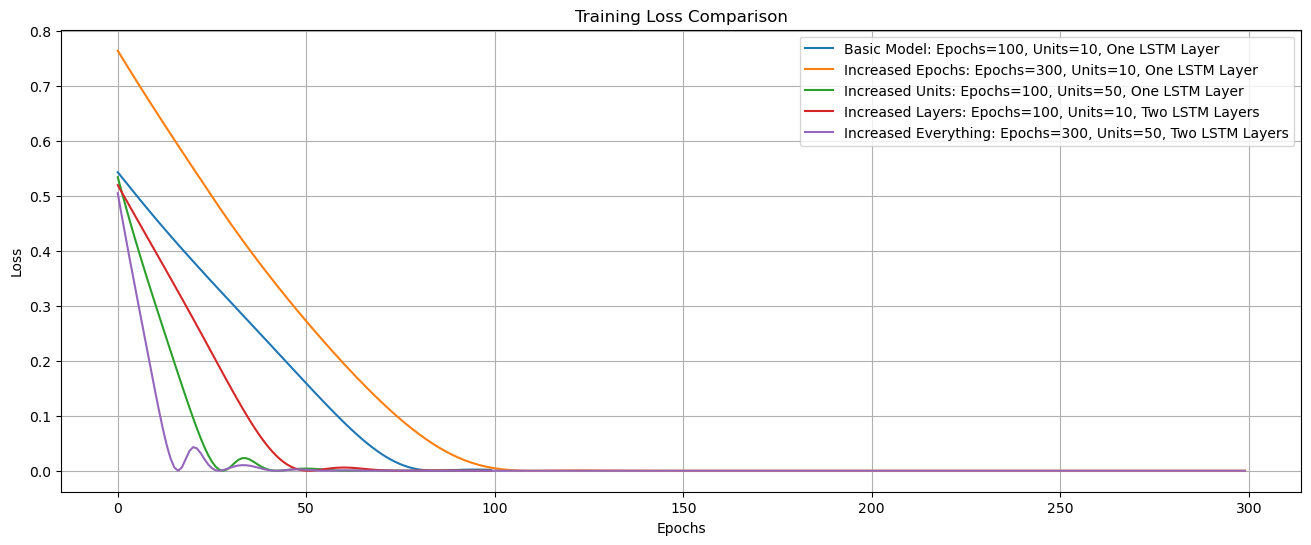

In [31]:
def plot_training_loss(histories, labels):
    plt.figure(figsize=(16, 6))

    # Plot the training loss for each model
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=label)

    # Adding plot details
    plt.title('Training Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Assuming you have already trained the models and collected their history
# Example model histories (replace with your actual histories)
histories = [history_0, history_1, history_2, history_3, history_4]
labels = [
    'Basic Model: Epochs=100, Units=10, One LSTM Layer',
    'Increased Epochs: Epochs=300, Units=10, One LSTM Layer',
    'Increased Units: Epochs=100, Units=50, One LSTM Layer',
    'Increased Layers: Epochs=100, Units=10, Two LSTM Layers',
    'Increased Everything: Epochs=300, Units=50, Two LSTM Layers'
]

# Plot the training loss for comparison
plot_training_loss(histories, labels)